In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

2023-03-26 17:04:10.120831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Exponential weighted moving average

In [2]:
df =pd.read_csv('../data/processed/weather_Madrid.csv')
df['CET']= pd.to_datetime(df['CET'])
df=df[['CET','Mean TemperatureC',]]
df=df[(df['CET'] >= '2015-01-01') & (df['CET'] <= '2015-12-31')]
df

,CET,Mean TemperatureC
6447,2015-01-01,3.0
6448,2015-01-02,3.0
6449,2015-01-03,4.0
6450,2015-01-04,7.0
6451,2015-01-05,6.0
...,...,...
6807,2015-12-27,7.0
6808,2015-12-28,8.0
6809,2015-12-29,8.0
6810,2015-12-30,8.0


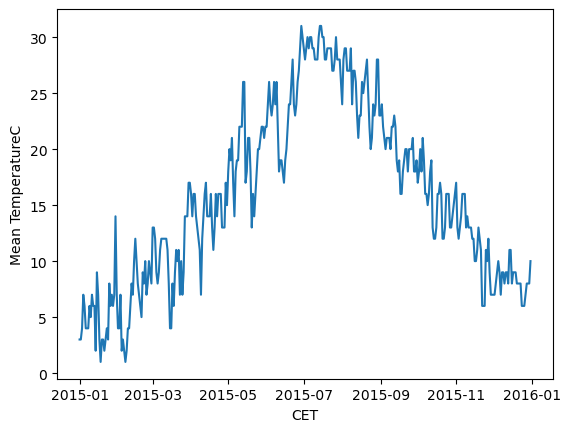

In [3]:
sns.lineplot(x='CET', y='Mean TemperatureC', data=df)
plt.show()

In [4]:
def ewma (theta,b=0.9):
    if len(theta) == 1:
        return b*0+(1-b)*theta[-1]
    else:
        return b*ewma(theta[:-1],b)+(1-b)*theta[-1]
    
def apply_ewma (df, b=0.9):
    v_data=[]
    for i in range(1,len(df)+1):
        v_data.append(ewma(df[:i],b)/(1-b**i))
    return v_data


In [5]:
df['ewma']=apply_ewma(list(df['Mean TemperatureC']),0.9)
df 

,CET,Mean TemperatureC,ewma
6447,2015-01-01,3.0,3.000000
6448,2015-01-02,3.0,3.000000
6449,2015-01-03,4.0,3.369004
6450,2015-01-04,7.0,4.424833
6451,2015-01-05,6.0,4.809480
...,...,...,...
6807,2015-12-27,7.0,7.886524
6808,2015-12-28,8.0,7.897872
6809,2015-12-29,8.0,7.908085
6810,2015-12-30,8.0,7.917276


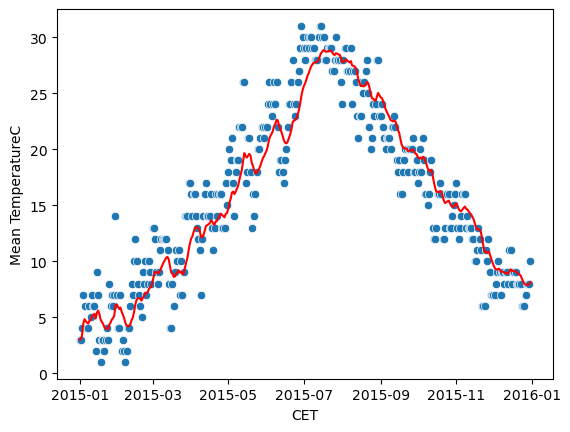

In [6]:
sns.scatterplot(x='CET', y='Mean TemperatureC', data=df)
sns.lineplot(x='CET', y='ewma', data=df, color='red')
plt.show()